In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("Movie dataset.csv", encoding='latin1')  # You can try 'iso-8859-1' or 'cp1252' if 'latin1' doesn't work
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
#DATA PREPROCESSING
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
#checking missing values
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.dropna(subset=['Name','Year','Duration','Votes','Rating','Genre'],inplace=True)
df.isna().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      1
Actor 1      74
Actor 2     115
Actor 3     161
dtype: int64

In [7]:
# remove rows with duplicate movie records
df.drop_duplicates(subset=['Name', 'Year', 'Director'], keep='first', inplace=True)

In [8]:
# Ensure all values in the 'Year' column are strings
df['Year'] = df['Year'].astype(str)

# Remove parentheses and convert to integers
df['Year'] = df['Year'].str.strip('()').astype(int)

# Check the first few rows to verify changes
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
#romoving mins string from duration column
df['Duration']=df['Duration'].astype(str)
df['Duration']=df['Duration'].str.replace(r'min', '').astype(int)
# remove commas from Votes column and convert to integer
df['Votes']=df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
# show the number of records and observations after cleaning the dataframe
df.shape

(5819, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5819 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5819 non-null   object 
 1   Year      5819 non-null   int32  
 2   Duration  5819 non-null   int32  
 3   Genre     5819 non-null   object 
 4   Rating    5819 non-null   float64
 5   Votes     5819 non-null   int32  
 6   Director  5818 non-null   object 
 7   Actor 1   5745 non-null   object 
 8   Actor 2   5704 non-null   object 
 9   Actor 3   5658 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 431.9+ KB


In [12]:
#show the statistics of the dataframe
df.describe()

,Year,Duration,Rating,Votes
count,5819.000000,5819.000000,5819.000000,5819.00000
mean,1996.637567,132.254339,5.929077,2625.54322
std,19.659042,26.560145,1.391625,13469.33966
min,1931.000000,21.000000,1.100000,5.00000
25%,1983.000000,117.000000,5.000000,29.00000
50%,2002.000000,134.000000,6.100000,122.00000
75%,2013.000000,150.000000,7.000000,864.50000
max,2021.000000,321.000000,10.000000,591417.00000


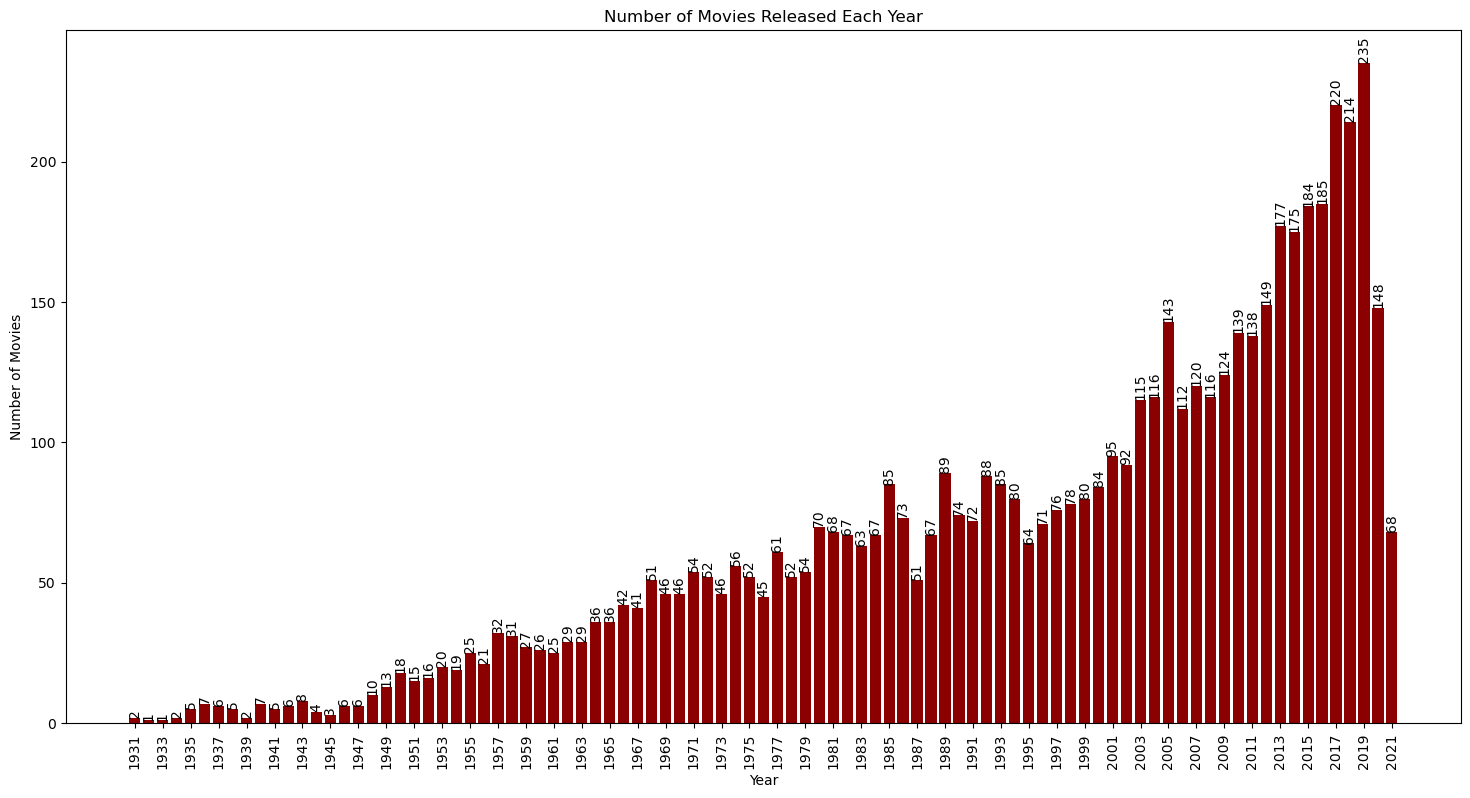

In [13]:
#EXPLORATORY DATA ANALYSIS(EDA)
#I.Number of movies each year

import matplotlib.pyplot as plt

# Group the data by Year and count the number of movies in each year
yearly_movie_counts = df['Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(18, 9))
bars = plt.bar(yearly_movie_counts.index, yearly_movie_counts.values, color='darkred')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

# Show every second year on the x-axis and rotate x-labels for better readability
plt.xticks(yearly_movie_counts.index[::2], rotation=90)

# Add text labels on top of the bars
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom', rotation=90)

plt.show()

In [14]:
#Creating genre dummy columns and analyzing movie counts by Genre

#create dummy columns for each genre
dummies = df['Genre'].str.get_dummies(', ')
#creating a new dataframe which combines df and dummies
df_genre = pd.concat([df,dummies], axis=1)

In [18]:
genre_columns = df_genre.columns[10:] 
#Assuming genre columns start from the 11th col
genre_columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

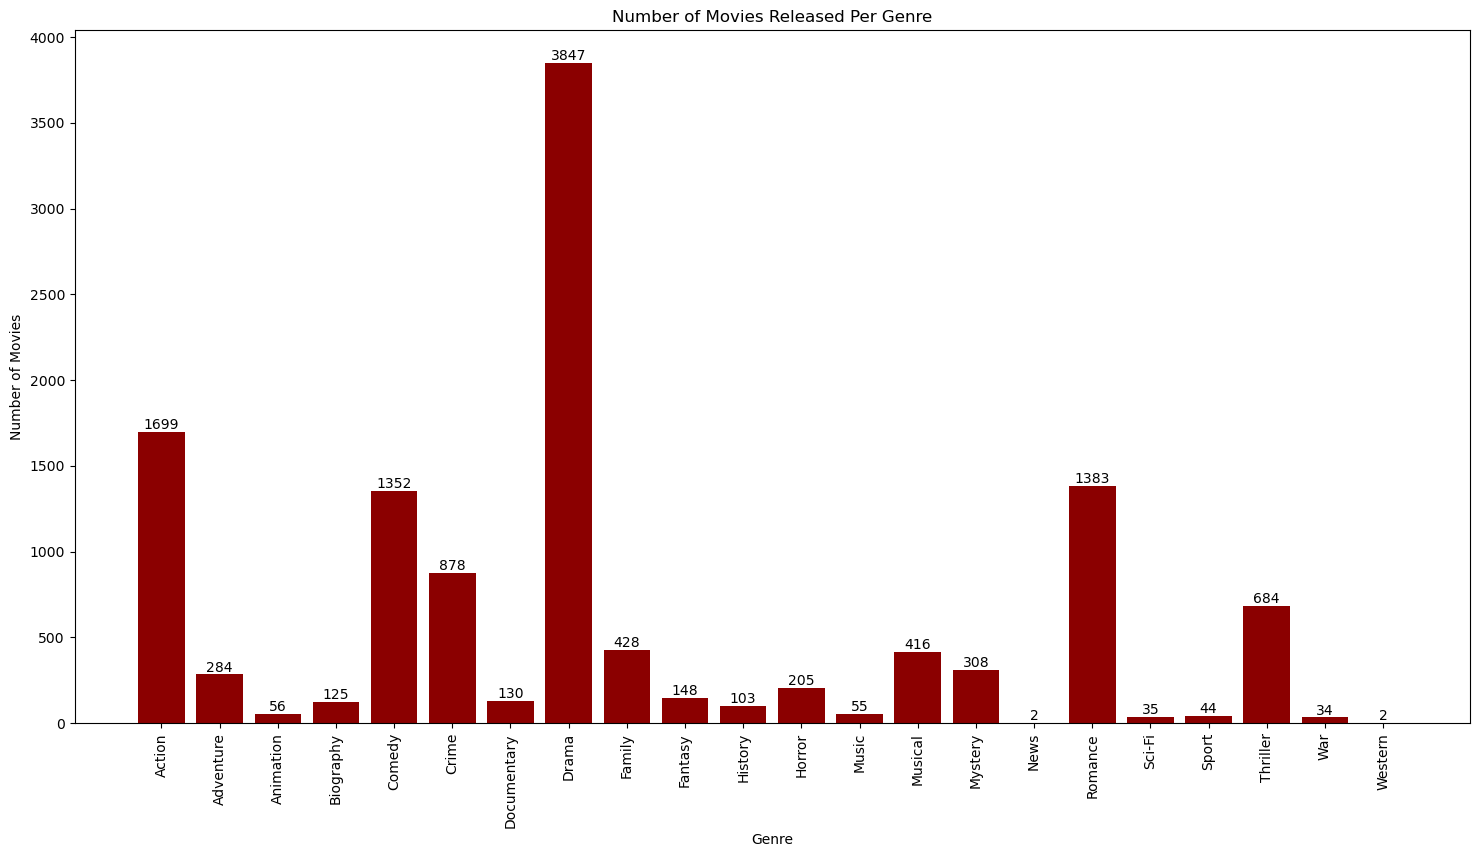

In [28]:
import matplotlib.pyplot as plt

# Group the data by genre columns and count the number of movies in each genre
genre_movie_counts = df_genre[dummies.columns].sum().sort_index()

# Create a bar chart
plt.figure(figsize=(18, 9))  # Adjust figure size if needed
bars = plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='darkred')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add text labels on top of the bars
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.show()

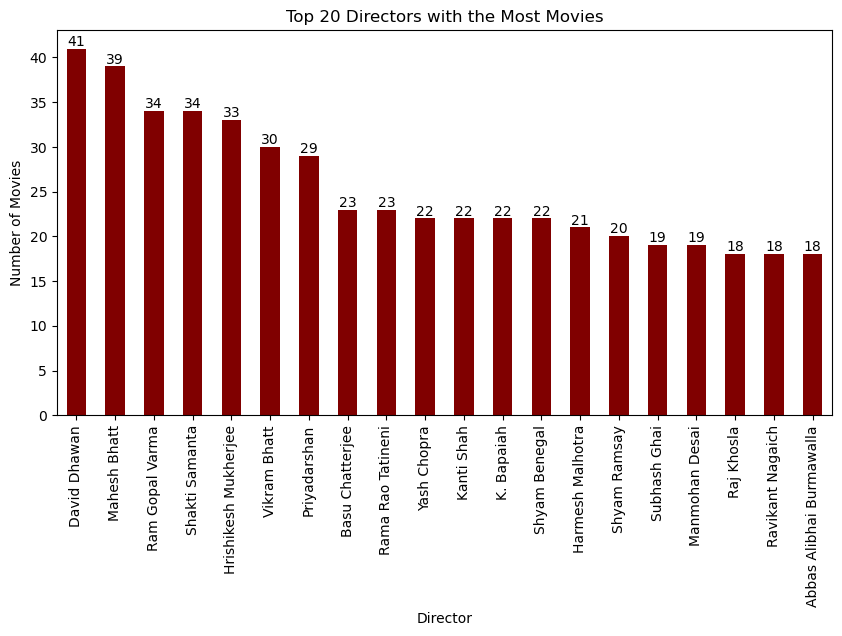

In [29]:
#TOP 20 DIRECTORS WITH THE MOST MOVIES
# Analyzing count of movies of each director
director_movie_counts = df['Director'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 5))
bars = director_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.xticks(rotation=90) 

# Add count labels on top of the bars
for bar in bars.patches:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.show()

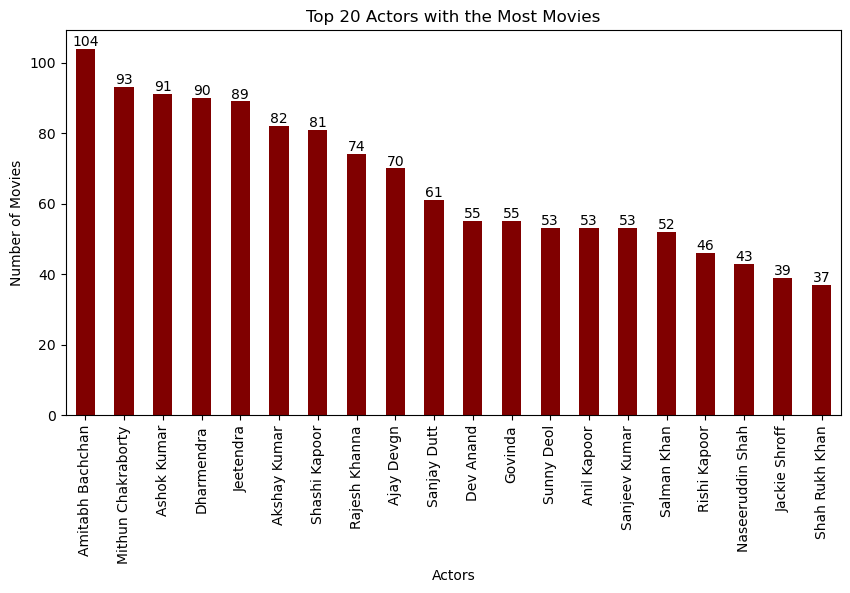

In [30]:
#TOP 20 ACTORS WITH THE MOST MOVIES

# To Count Top 20 movies for each actor
actor_movie_counts = df['Actor 1'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 5))
actor_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')
plt.xticks(rotation=90) 

# Add count labels on top of the bars
for i, v in enumerate(actor_movie_counts.head(20)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

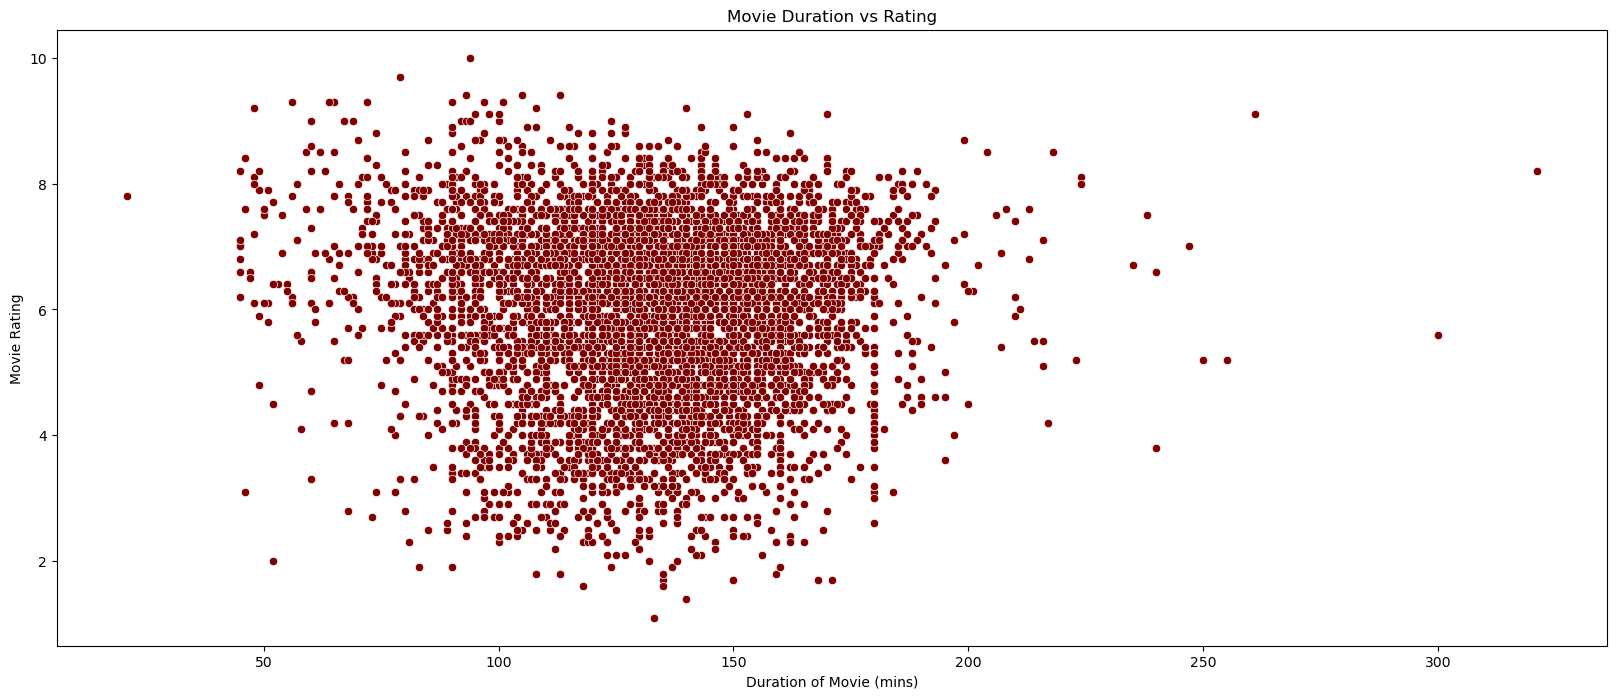

In [31]:
#MOVIE DURATION vs. RATING SCATTER PLOT

plt.figure(figsize=(20, 8))
# create a scatter plot with Duration and Rating relationship
sns.scatterplot(x=df['Duration'], y=df['Rating'],  color = 'maroon')
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

In [40]:
#FEATURE ENGINEERING

# dropping the columns from the dataframe since these are the least dependable observations for target variable 'Rating'
df.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
# show first five records of the dataframe
df.head()

KeyError: "['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'] not found in axis"

In [ ]:
# creating target variable and learning observations for the model
X = df[['Year','Duration','Votes']]
y = df['Rating']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

In [41]:
#MACHINE LEARNING MODELING THECHNIQUES

#1.LINEAR REGRESSION MODEL
# creating a liner regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

# training the data on linear regression model
lr.fit(X_train, y_train)

# predicting the test data on trained model
pred = lr.predict(X_test)

# evaluating linear regression model
r2_score(y_test,pred)

-0.025521052448932657

In [42]:
#2. K-Nearest Neighbors (KNN) Regression Model

# creating a range for number of neighbors parameter of the KNN model
kRange = range(1,40,1)

# creating an empty scores list
scores_list = []

# iterate every value in kRange list 
for i in kRange:
    # create a K Nearest Neighbor model with i as number of neighbors
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    # fit training data to the KNN model
    regressor_knn.fit(X_train,y_train)
    # evaluate the model
    pred = regressor_knn.predict(X_test)
    
    # append the regression score for evaluation of the model to scores_list
    scores_list.append(r2_score(y_test,pred))

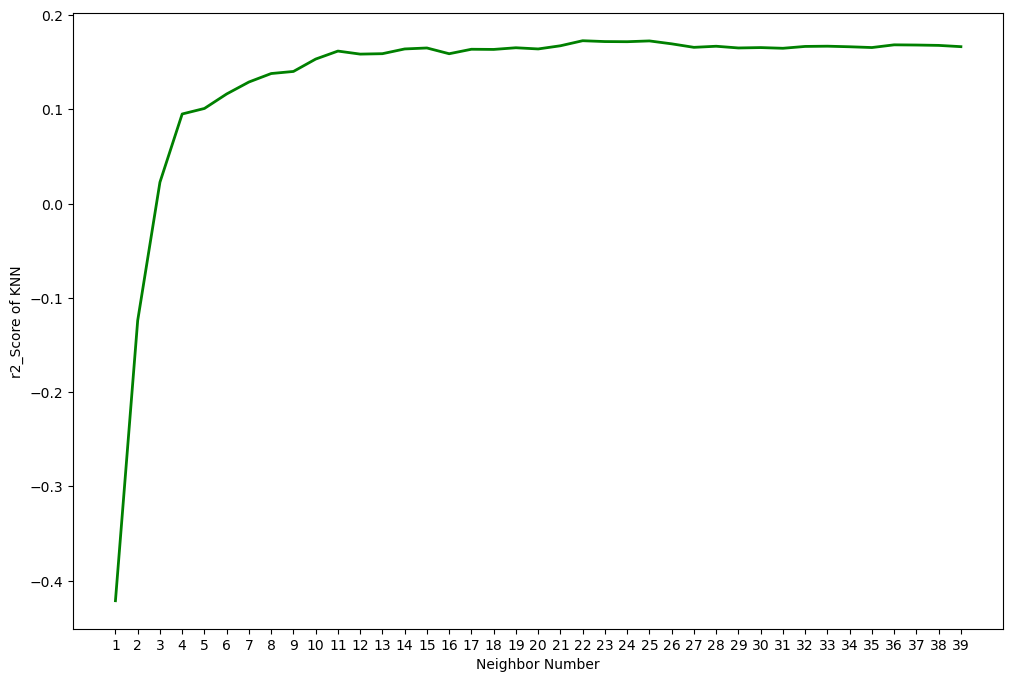

In [43]:
plt.figure(figsize=(12,8))
# create a line graph for showing regression score (scores_list) for respective number of neighbors used in the KNN model
plt.plot(kRange, scores_list, linewidth=2, color='green')
# values for x-axis should be the number of neighbors stored in kRange
plt.xticks(kRange)
plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show() 

In [44]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
regressor_knn = KNeighborsRegressor(n_neighbors = 23)

# fit training data to the KNN model
regressor_knn.fit(X_train,y_train)
# evaluate test data on the model
pred = regressor_knn.predict(X_test)
# show regression score
r2_score(y_test,pred)

0.1718268795077874

In [45]:
#3.SGD REGRESSION

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Create an instance of the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=100, random_state=1)  # You can adjust the max_iter and random_state

# Fit the model to your training data
sgd_regressor.fit(X_train, y_train)

# Make predictions
pred = sgd_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred)

print("R-squared score:", r2)

R-squared score: -5.543440137923642e+34


In [46]:
#4.RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
print(f'R-squared score (Random Forest): {r2_rf}')

R-squared score (Random Forest): 0.18171934284929803


In [47]:
#5.GRADIENT BOOSTING REGRESSION
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=231)
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
r2_gb = r2_score(y_test, gb_pred)
print(f'R-squared score: {r2_gb}')

R-squared score: 0.2703796819325127
